In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIoT2023_IPCASTD10%.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628497 entries, 0 to 3628496
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PC1          float64
 1   PC2          float64
 2   PC3          float64
 3   PC4          float64
 4   PC5          float64
 5   PC6          float64
 6   PC7          float64
 7   PC8          float64
 8   PC9          float64
 9   PC10         float64
 10  PC11         float64
 11  PC12         float64
 12  PC13         float64
 13  PC14         float64
 14  PC15         float64
 15  PC16         float64
 16  PC17         float64
 17  PC18         float64
 18  PC19         float64
 19  PC20         float64
 20  PC21         float64
 21  PC22         float64
 22  PC23         float64
 23  Attack Type  object 
dtypes: float64(23), object(1)
memory usage: 664.4+ MB


In [5]:
print("Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:


(3628497, 24)

In [6]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 0


In [7]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [8]:
print("Ukuran Dataset Sesudah Drop Duplikat:")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:


(3628497, 24)

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PC1,3628497.0,-1.234467e-17,2.900607,-2.607324,-1.095785,-0.932276,-0.652747,149.632461
PC2,3628497.0,4.107894e-16,1.971187,-7.972324,-1.413041,-0.081109,0.274327,101.055593
PC3,3628497.0,-1.417758e-16,1.805279,-55.069477,-1.139432,-0.097206,1.613707,22.822641
PC4,3628497.0,9.336835e-18,1.756273,-21.782844,-0.354302,0.192984,0.564171,20.297875
PC5,3628497.0,7.720121e-17,1.640130,-156.268986,-0.001140,0.008415,0.047231,0.905673
PC6,3628497.0,7.127953e-17,1.472905,-36.098743,-0.669017,-0.062364,1.393293,40.761383
PC7,3628497.0,2.113516e-17,1.406282,-5.378058,-0.301164,-0.147963,0.345288,138.315213
PC8,3628497.0,1.284794e-17,1.347754,-1.454871,-0.032037,-0.002833,0.024654,864.955057
PC9,3628497.0,1.526479e-16,1.340813,-82.873795,-0.318178,0.407333,0.622024,27.921680
PC10,3628497.0,6.148838e-18,1.295772,-17.243475,-0.125923,0.038139,0.322759,61.043155


In [10]:
print("Jumlah Serangan Pada Dataset:")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset:


Attack Type
DDoS              2450879
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64

In [11]:
label_map = {
        'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'Mirai': 3,
        'Network Attack': 4, 'Recon': 5, 'Brute Force': 6,
        'Injection': 7, 'Malware': 8,
    }
dataset["Attack Type"] = dataset["Attack Type"].map(label_map)

In [12]:
features = dataset.drop('Attack Type',axis=1)
labels = dataset["Attack Type"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)

print("X_test:",x_test.shape)
print("y_test:",y_test.shape)

X_train: (2902797, 23)
y_train: (2902797,)
X_test: (725700, 23)
y_test: (725700,)


In [15]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train, num_classes=9)
y_test_cat = to_categorical(y_test, num_classes=9)

In [16]:
# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 9 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-07-07 12:47:58.865295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-07 12:47:58.865657: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
45357/45357 [==============================] - 52s 1ms/step - loss: 0.3235 - accuracy: 0.8525 - val_loss: 0.3080 - val_accuracy: 0.8651
Epoch 2/5
45357/45357 [==============================] - 53s 1ms/step - loss: 0.2503 - accuracy: 0.8922 - val_loss: 0.1881 - val_accuracy: 0.9209
Epoch 3/5
45357/45357 [==============================] - 53s 1ms/step - loss: 0.1788 - accuracy: 0.9296 - val_loss: 0.1752 - val_accuracy: 0.9328
Epoch 4/5
45357/45357 [==============================] - 53s 1ms/step - loss: 0.1382 - accuracy: 0.9481 - val_loss: 0.1325 - val_accuracy: 0.9392
Epoch 5/5
22679/22679 [==============================] - 18s 790us/step - loss: 0.0903 - accuracy: 0.9670
Test Loss: 0.09034240990877151
Test Accuracy: 0.9670235514640808
22679/22679 [==============================] - 15s 670us/step
Confusion Matrix:
[[ 20747     56      0      0    977    280      0      0      0]
 [     1 486915   2637     13     89     37      0      0      0]
 [     0  11686 135972     14    

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.94      0.86     22060
           1       0.98      0.99      0.98    489692
           2       0.98      0.92      0.95    147768
           3       1.00      0.99      1.00     48629
           4       0.73      0.64      0.68     10779
           5       0.84      0.47      0.60      6212
           6       1.00      0.13      0.23       264
           7       0.00      0.00      0.00       232
           8       0.00      0.00      0.00        64

    accuracy                           0.97    725700
   macro avg       0.70      0.57      0.59    725700
weighted avg       0.97      0.97      0.97    725700



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


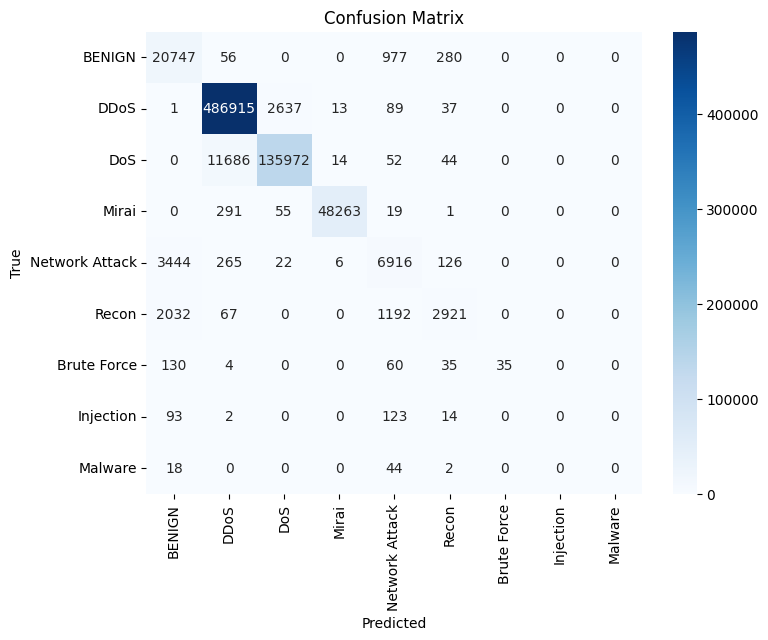

In [17]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
